In [67]:
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [69]:
df = pd.read_csv('E:/jupyter/机器学习项目/红酒质量-svm/winequality-red.csv')

In [71]:
X = df.drop('quality', axis=1).values
Y = df['quality'].values

In [73]:
Y = Y - 3

In [75]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [77]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))  # 6个类别（3-8）

In [79]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [81]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 3.5185 - accuracy: 0.3617 - val_loss: 1.4850 - val_accuracy: 0.4180
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 1.4614 - accuracy: 0.4633 - val_loss: 1.1915 - val_accuracy: 0.5352
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2964 - accuracy: 0.5005 - val_loss: 1.1282 - val_accuracy: 0.4805
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2180 - accuracy: 0.5044 - val_loss: 1.1056 - val_accuracy: 0.4922
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 1.1853 - accuracy: 0.4878 - val_loss: 1.0740 - val_accuracy: 0.5156
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1457 - accuracy: 0.5064 - val_loss: 1.0591 - val_accuracy: 0.5469
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 1.1401 - accuracy: 0.5024 - val_loss: 1.0574 - val_accuracy: 0.5352
Epoch 8/100
3

In [83]:
Y_train_pred = model.predict(X_train)
Y_train_pred_max = np.argmax(Y_train_pred, axis=1)
accuracy = accuracy_score(Y_train_pred_max, Y_train)
print(f"Accuracy: {accuracy:.4f}")
f1_train= f1_score(Y_train_pred_max, Y_train, average='weighted')
print(f1_train)

40/40 [==============================] - 0s 667us/step
Accuracy: 0.6005
0.619670705299501


In [85]:
Y_test_pred = model.predict(X_test)
Y_test_pred_max = np.argmax(Y_test_pred, axis=1)
accuracy = accuracy_score(Y_test_pred_max, Y_test)
print(f"Accuracy: {accuracy:.4f}")
f1_test= f1_score(Y_test_pred_max, Y_test, average='weighted')
print(f1_test)

10/10 [==============================] - 0s 778us/step
Accuracy: 0.5469
0.5730088771984139


In [87]:
Y_train_pred_max.shape

(1279,)

In [89]:
matplotlib.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
matplotlib.rcParams['axes.unicode_minus'] = False  # 解决负号 '-' 显示为方块的问题plt.figure(figsize=(10, 7))

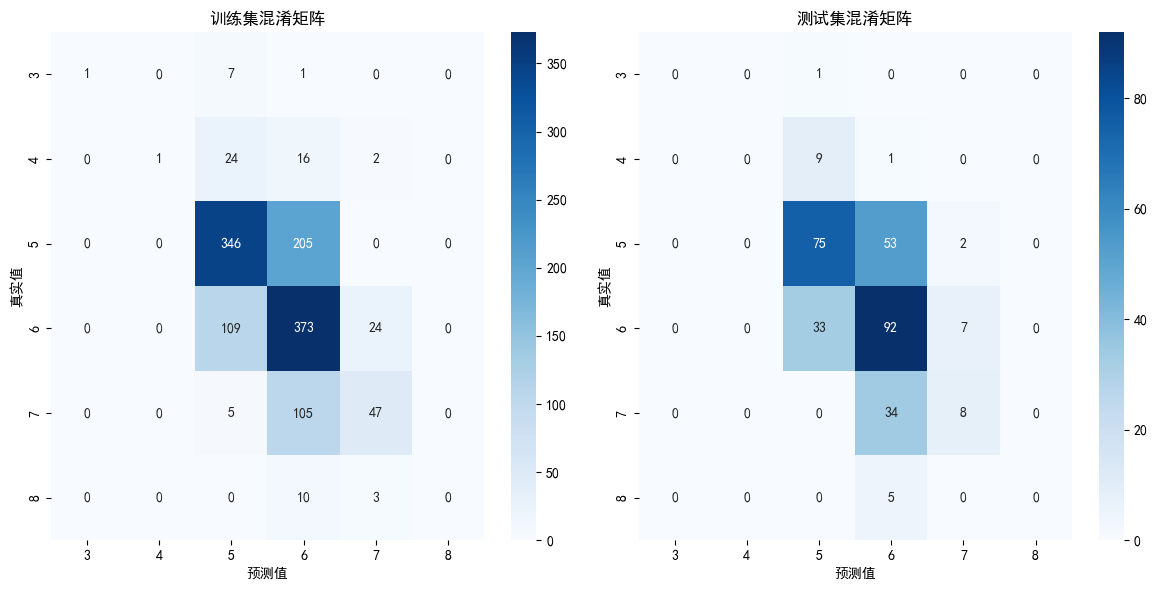

In [91]:
conf_matrix = confusion_matrix(Y_train, Y_train_pred_max)
conf_matrix_test = confusion_matrix(Y_test, Y_test_pred_max)

# 设置图形大小
fig_size = (12, 6)  # 12 英寸宽, 6 英寸高
fig, ax = plt.subplots(1, 2, figsize=fig_size)

# 绘制训练集的混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[0])  # 使用ax[0]指定在哪个子图上绘制
ax[0].set_ylabel('真实值')
ax[0].set_xlabel('预测值')
ax[0].set_title('训练集混淆矩阵')

# 绘制测试集的混淆矩阵
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[3, 4, 5, 6, 7, 8],  # 根据你的分类标签修改
            yticklabels=[3, 4, 5, 6, 7, 8], ax=ax[1])  # 使用ax[1]指定在哪个子图上绘制
ax[1].set_ylabel('真实值')
ax[1].set_xlabel('预测值')
ax[1].set_title('测试集混淆矩阵')

# 自动调整布局
plt.tight_layout()
plt.savefig("深度学习-红酒-默认.png", dpi=300, bbox_inches='tight') 
# 显示图形
plt.show()

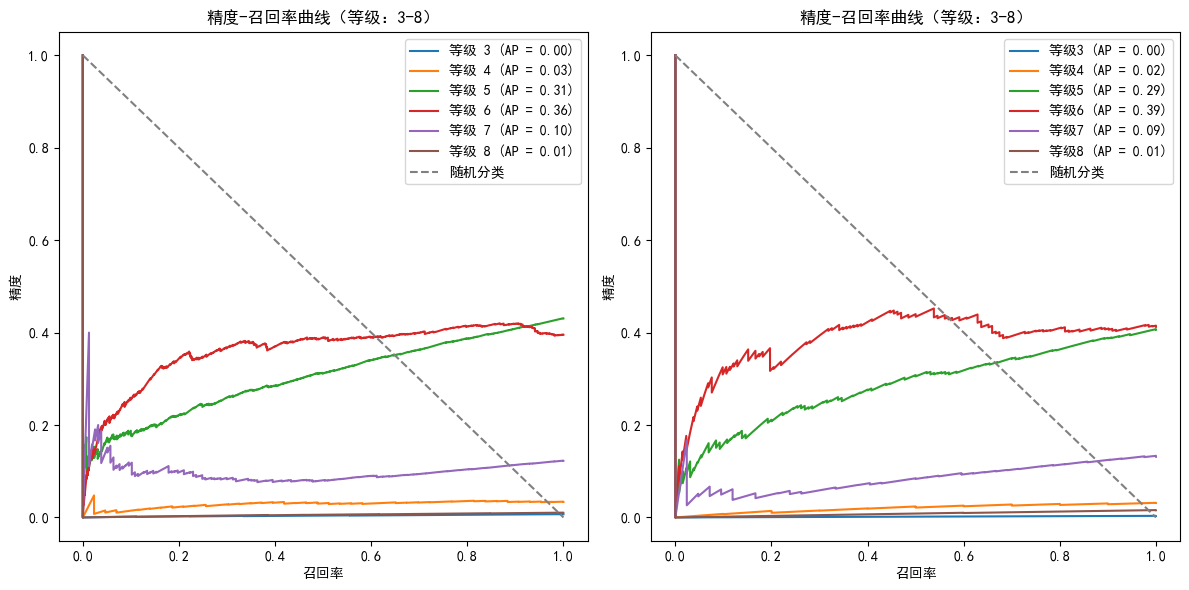

In [93]:
unique_classes_train = np.unique(Y_train)

# 获取测试集的预测概率
unique_classes_test = np.unique(Y_test)

# 设置图形大小和子图的排列 (1 行 2 列)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 绘制训练集的精度-召回率曲线
for i in unique_classes_train:
    precision, recall, _ = precision_recall_curve(Y_train == i, Y_train_pred[:, i-3])
    ax[0].plot(recall, precision, label=f'等级 {i+3} (AP = {average_precision_score(Y_train == i, Y_train_pred[:, i-3]):.2f})')

# 绘制测试集的精度-召回率曲线
for i in unique_classes_test:
    precision, recall, _ = precision_recall_curve(Y_test == i, Y_test_pred[:, i-3])
    ax[1].plot(recall, precision, label=f'等级{i+3} (AP = {average_precision_score(Y_test == i, Y_test_pred[:, i-3]):.2f})')

# 在两个子图中分别绘制随机分类器的对角线
ax[0].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')
ax[1].plot([0, 1], [1, 0], linestyle='--', color='gray', label='随机分类')

# 设置标题、标签和图例
ax[0].set_title('精度-召回率曲线（等级：3-8）')
ax[0].set_xlabel('召回率')
ax[0].set_ylabel('精度')
ax[0].legend(loc='best')

ax[1].set_title('精度-召回率曲线（等级：3-8）')
ax[1].set_xlabel('召回率')
ax[1].set_ylabel('精度')
ax[1].legend(loc='best')
plt.savefig("深度学习-精度召回率-默认.png", dpi=300, bbox_inches='tight') 
# 自动调整布局
plt.tight_layout()

# 显示图形
plt.show()